In [1]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import warnings
import logging
import joblib
from sklearn import metrics
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, RocCurveDisplay 
from sklearn.metrics import accuracy_score, roc_auc_score, log_loss, confusion_matrix, roc_curve, auc
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from typing import List
from tabulate import tabulate
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize, LabelEncoder
from sklearn.datasets import make_classification

In [2]:
#Loading our metrics for each case

# Datasample 1
server_accuracy1         = joblib.load("server_acc_5c_5e_5r_datasample1.pkl")
client_accuracy1         = joblib.load("client_acc_5c_5e_5r_datasample1.pkl")
client_loss1             = joblib.load("client_loss_5c_5e_5r_datasample1.pkl")
server_precision1        = joblib.load("server_prec_5c_5e_5r_datasample1.pkl")
server_precision_macro1  = joblib.load("server_prec_macro_5c_5e_5r_datasample1.pkl")
metrics_ftp1             = joblib.load("eval_met_5cars_5_epochs_5_rounds_datasample1.pkl")
metrics_clas_report1     = joblib.load("gen_met_5c_5r_5e_datasample1.pkl")

# Datasample 2
server_accuracy2         = joblib.load("server_acc_5c_5e_5r_datasample2.pkl")
client_accuracy2         = joblib.load("client_acc_5c_5e_5r_datasample2.pkl")
client_loss2             = joblib.load("client_loss_5c_5e_5r_datasample2.pkl")
server_precision2        = joblib.load("server_prec_5c_5e_5r_datasample2.pkl")
server_precision_macro2  = joblib.load("server_prec_macro_5c_5e_5r_datasample2.pkl")
metrics_ftp2             = joblib.load("eval_met_5cars_5_epochs_5_rounds_datasample2.pkl")
metrics_clas_report2     = joblib.load("gen_met_5c_5r_5e_datasample2.pkl")


# Datasample 3
server_accuracy3         = joblib.load("server_acc_5c_5e_5r_datasample3.pkl")
client_accuracy3         = joblib.load("client_acc_5c_5e_5r_datasample3.pkl")
client_loss3             = joblib.load("client_loss_5c_5e_5r_datasample3.pkl")
server_precision3        = joblib.load("server_prec_5c_5e_5r_datasample3.pkl")
server_precision_macro3  = joblib.load("server_prec_macro_5c_5e_5r_datasample3.pkl")
metrics_ftp3             = joblib.load("eval_met_5cars_5_epochs_5_rounds_datasample3.pkl")
metrics_clas_report3     = joblib.load("gen_met_5c_5r_5e_datasample3.pkl")

#Datasample4
server_accuracy4         = joblib.load("server_acc_5c_5e_5r_datasample4.pkl")
client_accuracy4         = joblib.load("client_acc_5c_5e_5r_datasample4.pkl")
client_loss4             = joblib.load("client_loss_5c_5e_5r_datasample4.pkl")
server_precision4        = joblib.load("server_prec_5c_5e_5r_datasample4.pkl")
server_precision_macro4  = joblib.load("server_prec_macro_5c_5e_5r_datasample4.pkl")
metrics_ftp4             = joblib.load("eval_met_5cars_5_epochs_5_rounds_datasample4.pkl")
metrics_clas_report4     = joblib.load("gen_met_5c_5r_5e_datasample4.pkl")


In [3]:
# Since Datasemple3 is the best model so far, we are going to look at the metrics within different scenarios
metrics_clas_report_info_gain = joblib.load("gen_met_5c_5r_5e_datasample3_info_gain.pkl")

# MLP classifier with 150 iterations:
metrics_clas_report_init_mlp_150_iter = joblib.load("gen_met_init_model_150iter.pkl") #Initial model
metrics_clas_report3_mlp_150_iter = joblib.load("gen_met_5c_5r_5e_datasample3_mlp_150_iter.pkl") #5round 5cars 5epochs
init_model_10_iter = joblib.load("gen_met_init_model_10iter.pkl") 
 
# 10 Cars 5 epochs 5 rounds case
server_accuracy3_10_5_5         = joblib.load("server_acc_10c_5e_5r_datasample3.pkl")
client_accuracy3_10_5_5         = joblib.load("client_acc_10c_5e_5r_datasample3.pkl")
client_loss3_10_5_5             = joblib.load("client_loss_10c_5e_5r_datasample3.pkl")
server_precision3_10_5_5        = joblib.load("server_prec_10c_5e_5r_datasample3.pkl")
server_precision_macro3_10_5_5  = joblib.load("server_prec_macro_10c_5e_5r_datasample3.pkl")
metrics_ftp3_10_5_5             = joblib.load("eval_met_10cars_5_epochs_5_rounds_datasample3.pkl")
metrics_clas_report3_10_5_5     = joblib.load("gen_met_10c_5r_5e_datasample3.pkl")

# 15 Cars 5 epochs 5 rounds case
server_accuracy3_15_5_5         = joblib.load("server_acc_15c_5e_5r_datasample3.pkl")
client_accuracy3_15_5_5         = joblib.load("client_acc_15c_5e_5r_datasample3.pkl")
client_loss3_15_5_5             = joblib.load("client_loss_15c_5e_5r_datasample3.pkl")
server_precision3_15_5_5        = joblib.load("server_prec_15c_5e_5r_datasample3.pkl")
server_precision_macro3_15_5_5  = joblib.load("server_prec_macro_15c_5e_5r_datasample3.pkl")
metrics_ftp3_15_5_5             = joblib.load("eval_met_15cars_5_epochs_5_rounds_datasample3.pkl")
metrics_clas_report3_15_5_5     = joblib.load("gen_met_15c_5r_5e_datasample3.pkl")

# 20 Cars 5 epochs 5 rounds case
server_accuracy3_20_5_5         = joblib.load("server_acc_20c_5e_5r_datasample3.pkl")
client_accuracy3_20_5_5         = joblib.load("client_acc_20c_5e_5r_datasample3.pkl")
client_loss3_20_5_5             = joblib.load("client_loss_20c_5e_5r_datasample3.pkl")
server_precision3_20_5_5        = joblib.load("server_prec_20c_5e_5r_datasample3.pkl")
server_precision_macro3_20_5_5  = joblib.load("server_prec_macro_20c_5e_5r_datasample3.pkl")
metrics_ftp3_20_5_5             = joblib.load("eval_met_20cars_5_epochs_5_rounds_datasample3.pkl")
metrics_clas_report3_20_5_5     = joblib.load("gen_met_20c_5r_5e_datasample3.pkl")

#Loading the best model and test data
final_model_20                  = joblib.load("final_model_20cars_5epoch_5rounds_datasample3.pkl")
test_data_model3                = joblib.load("test_data_datasample3.pkl")

##

## Loading results of different models (FedMLP, MLP, Decision Tree, SVM)

In [20]:
# Load Centralized MLP
cmlp_model = joblib.load("initial_model_mlp.pkl")
X_test, y_test = joblib.load('test_data_mlp.pkl')

# get predictions from central MLP
y_pred_cmlp = cmlp_model.predict(X_test)
cm_cmlp = confusion_matrix(y_test, y_pred_cmlp)

# Calculating and printing accuracy, precision, recall, F1-score. Setting "zero_division=1" for those classes where non of the instances where predicted correclty
accuracy_cmlp = accuracy_score(y_test, y_pred_cmlp)
precision_cmlp = precision_score(y_test, y_pred_cmlp, average='weighted', zero_division=1)
precision_macro_cmlp = precision_score(y_test, y_pred_cmlp, average='macro', zero_division=1)
recall_cmlp = recall_score(y_test,y_pred_cmlp, average='weighted', zero_division=1)
f1_cmlp = f1_score(y_test, y_pred_cmlp, average='weighted', zero_division=1)

# Storing initial model's metrics for later
general_metrics_cmlp = {
    'Accuracy': accuracy_cmlp,
    'Precision': precision_cmlp,
    'Macro Precision': precision_macro_cmlp,
    'Recall': recall_cmlp,
    'F1-Score': f1_cmlp}

#
general_metrics_cmlp = pd.DataFrame([general_metrics_cmlp]).T
general_metrics_cmlp.columns = ["Values"]
general_metrics_cmlp.to_pickle("gen_met_cmlp_model.pkl")

#//////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////#
#//////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////#

## Linear SVM
svm_model = joblib.load("initial_model_svm.pkl")
X_test, y_test = joblib.load('test_data__svm.pkl')

# get predictions
y_pred_svm = svm_model.predict(X_test)
cm_svm = confusion_matrix(y_test, y_pred_svm)

# Calculating and printing accuracy, precision, recall, F1-score. Setting "zero_division=1" for those classes where non of the instances where predicted correclty
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm, average='weighted', zero_division=1)
precision_macro_svm = precision_score(y_test, y_pred_svm, average='macro', zero_division=1)

recall_svm = recall_score(y_test, y_pred_svm, average='weighted', zero_division=1)
f1_svm = f1_score(y_test, y_pred_svm, average='weighted', zero_division=1)

# Storing initial model's metrics for later
general_metrics_svm = {
    'Accuracy': accuracy_svm,
    'Precision': precision_svm,
    'Macro Precision': precision_macro_svm,
    'Recall': recall_svm,
    'F1-Score': f1_svm
}

general_metrics_svm = pd.DataFrame([general_metrics_svm]).T
general_metrics_svm.columns = ["Values"]
general_metrics_svm.to_pickle("gen_met_svm_model.pkl")

#//////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////#
#//////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////#

#Decision Tree Classifier
des_tree_model = joblib.load('initial_model_des_tree.pkl')
X_test, y_test = joblib.load('test_data_des_tree.pkl')

# get predictions
y_pred_des_tree = des_tree_model.predict(X_test)
cm_des_tree = confusion_matrix(y_test, y_pred_des_tree)

# Calculating and printing accuracy, precision, recall, F1-score. Setting "zero_division=1" for those classes where non of the instances where predicted correclty
accuracy_des_tree = accuracy_score(y_test, y_pred_des_tree)
precision_des_tree = precision_score(y_test, y_pred_des_tree, average='weighted', zero_division=1)
precision_macro_des_tree = precision_score(y_test, y_pred_des_tree, average='macro', zero_division=1)
recall_des_tree = recall_score(y_test, y_pred_des_tree, average='weighted', zero_division=1)
f1_des_tree = f1_score(y_test, y_pred_des_tree, average='weighted', zero_division=1)

# Storing initial model's metrics for later
general_metrics_des_tree = {
    'Accuracy': accuracy_des_tree,
    'Precision': precision_des_tree,
    'Macro Precision': precision_macro_des_tree,
    'Recall': recall_des_tree,
    'F1-Score': f1_des_tree
}

general_metrics_des_tree = pd.DataFrame([general_metrics_des_tree]).T
general_metrics_des_tree.columns = ["Values"]
general_metrics_des_tree.to_pickle("gen_met_des_tree_model.pkl")

##
## Graphs

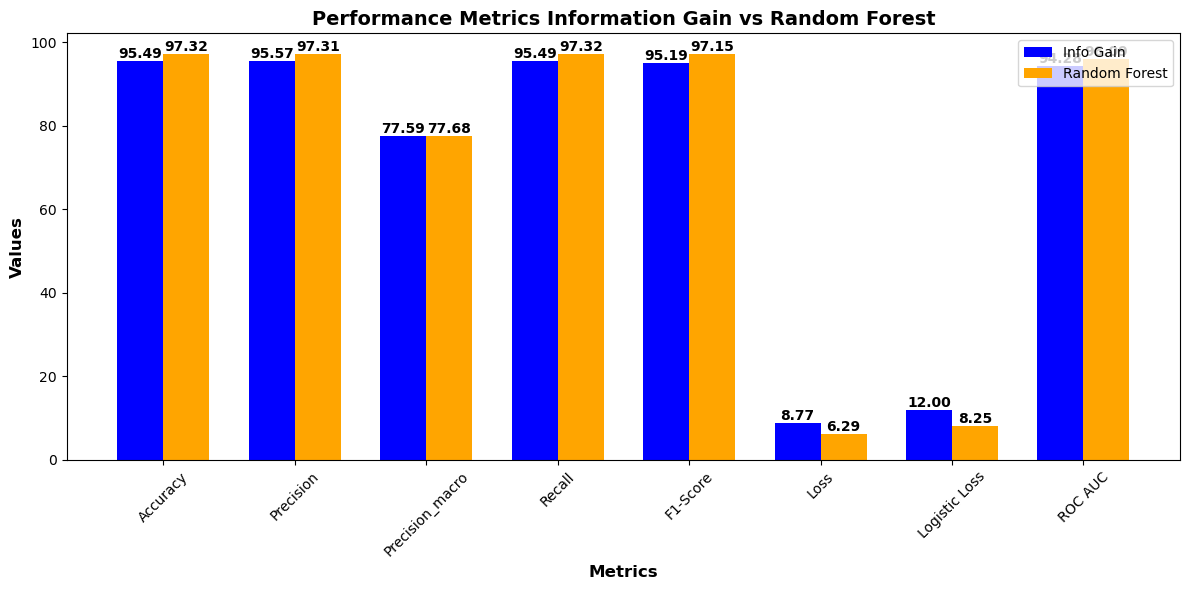

In [40]:
# get metrics of info gain and random forest
values_info_gain = metrics_clas_report_info_gain['Values'].values*100
values_random_forest = metrics_clas_report3['Values'].values*100

# set metrics
metrics = ['Accuracy', 'Precision', 'Precision_macro', 'Recall', 'F1-Score', 'Loss', 'Logistic Loss', 'ROC AUC']

#plot graph
bar_width = 0.35
index = np.arange(len(metrics))  # Number of metrics
plt.figure(figsize=(12, 6))

plt.bar(index, values_info_gain, bar_width, label='Info Gain', color='blue')
plt.bar(index + bar_width, values_random_forest, bar_width, label='Random Forest', color='orange')

for i in range(len(metrics)):
    plt.text(i, values_info_gain[i] - 0.01, f'{values_info_gain[i]:.2f}', ha='center', va='bottom', fontsize=10, fontweight='bold')
    plt.text(i + bar_width, values_random_forest[i] - 0.01, f'{values_random_forest[i]:.2f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.xlabel('Metrics', fontweight='bold', fontsize=12)
plt.ylabel('Values', fontweight='bold', fontsize=12)
plt.title('Performance Metrics Information Gain vs Random Forest', fontweight='bold', fontsize=14)

plt.xticks(index + bar_width / 2, metrics, rotation=45)

plt.legend(loc='upper right')

plt.savefig("Performance_Metrics_IngoGain_vs_RandomFor.png", format='png', dpi=500, bbox_inches='tight')

plt.tight_layout()
plt.show()

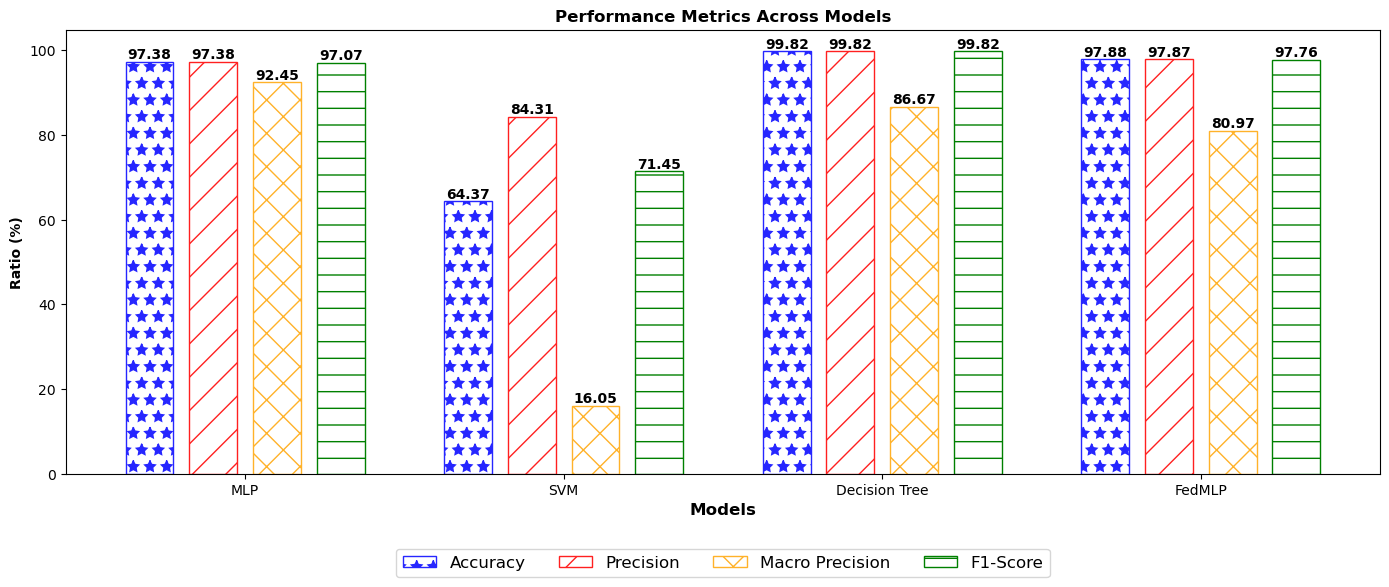

In [32]:
# Models to compare
models = ['MLP', 'SVM', 'Decision Tree', 'FedMLP']

# get all model metrics per metric
accuracy_merged_models = [
    general_metrics_cmlp.loc['Accuracy', 'Values'] * 100,
    general_metrics_svm.loc['Accuracy', 'Values'] * 100,
    general_metrics_des_tree.loc['Accuracy', 'Values'] * 100,
    metrics_clas_report3_20_5_5.loc['Accuracy', 'Values']* 100
]

precision_merged_models = [
    general_metrics_cmlp.loc['Precision', 'Values'] * 100,
    general_metrics_svm.loc['Precision', 'Values'] * 100,
    general_metrics_des_tree.loc['Precision', 'Values'] * 100,
    metrics_clas_report3_20_5_5.loc['Precision', 'Values'] * 100
]

precision_macro_merged_models = [
    general_metrics_cmlp.loc['Macro Precision', 'Values'] * 100,
    general_metrics_svm.loc['Macro Precision', 'Values'] * 100,
    general_metrics_des_tree.loc['Macro Precision', 'Values'] * 100,
    metrics_clas_report3_20_5_5.loc['Precision_macro', 'Values'] * 100
]

f1_score_merged_models = [
    general_metrics_cmlp.loc['F1-Score', 'Values'] * 100,
    general_metrics_svm.loc['F1-Score', 'Values'] * 100,
    general_metrics_des_tree.loc['F1-Score', 'Values'] * 100,
    metrics_clas_report3_20_5_5.loc['F1-Score', 'Values']* 100
]

# plot graphs
bar_width = 0.15
spacing = 0.05
index = np.arange(len(models))

# get position for bars
r1 = index
r2 = [x + bar_width + spacing for x in r1]
r3 = [x + 2 * (bar_width + spacing) for x in r1]
r4 = [x + 3 * (bar_width + spacing) for x in r1]

plt.figure(figsize=(14, 6))

# plot bars
plt.bar(r1, accuracy_merged_models, color='white', width=bar_width, edgecolor='#2626ff', label='Accuracy', hatch='*')
plt.bar(r2, precision_merged_models, color='white', width=bar_width, edgecolor='#ff2020', label='Precision', hatch='/')
plt.bar(r3, precision_macro_merged_models, color='white', width=bar_width, edgecolor='#ffb229', label='Macro Precision', hatch='x')
plt.bar(r4, f1_score_merged_models, color='white', width=bar_width, edgecolor='#008000', label='F1-Score', hatch='-' )


for i in range(len(models)):
    plt.text(r1[i], accuracy_merged_models[i] - 0.01, f'{accuracy_merged_models[i]:.2f}', ha='center', va='bottom', fontsize=10, fontweight='bold')
    plt.text(r2[i], precision_merged_models[i] - 0.01, f'{precision_merged_models[i]:.2f}', ha='center', va='bottom', fontsize=10, fontweight='bold')
    plt.text(r3[i], precision_macro_merged_models[i] - 0.01, f'{precision_macro_merged_models[i]:.2f}', ha='center', va='bottom', fontsize=10, fontweight='bold')
    plt.text(r4[i], f1_score_merged_models[i] - 0.01, f'{f1_score_merged_models[i]:.2f}', ha='center', va='bottom', fontsize=10, fontweight='bold')
    
plt.xlabel('Models', fontweight='bold',fontsize=12)
plt.ylabel('Ratio (%)', fontweight='bold')
plt.title('Performance Metrics Across Models', fontweight='bold')

plt.xticks([r + 1.5 * (bar_width + spacing) for r in index], models)

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=5, fontsize=12, frameon=True)

plt.savefig("Performance Metrics Across Models.png", format='png', dpi=500, bbox_inches='tight')

plt.tight_layout()
plt.show()

#

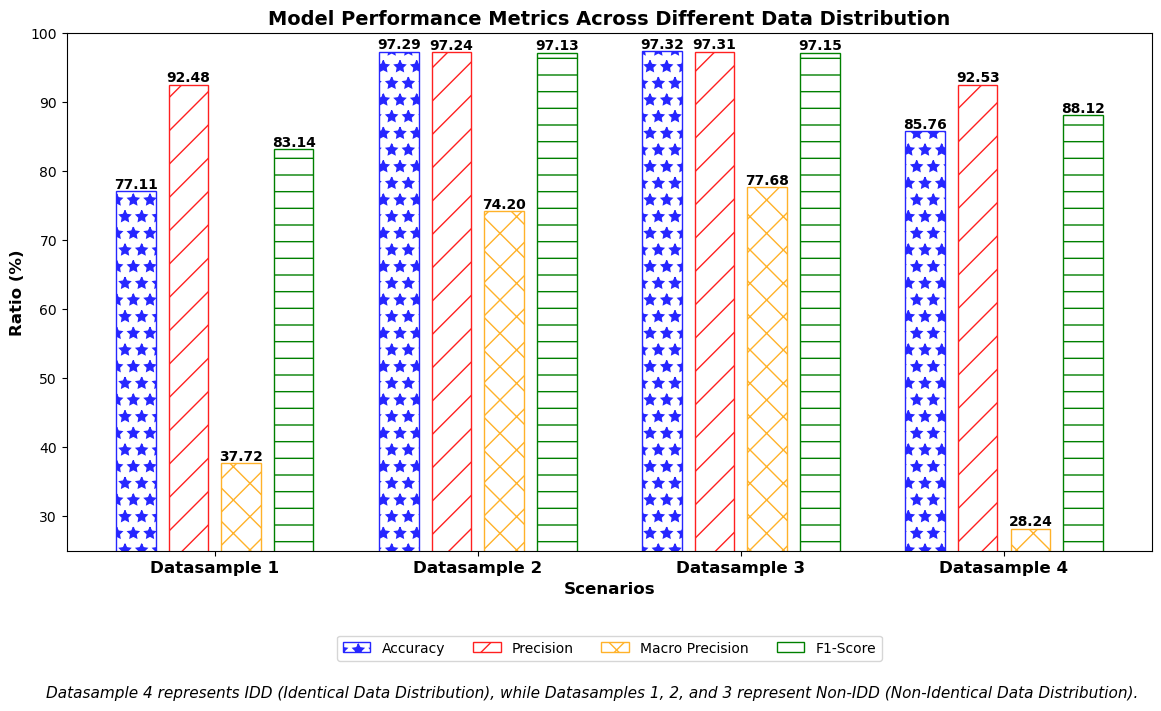

In [6]:
# Extracting the metrics for 4 scenarios
accuracy_merged = [
    metrics_clas_report1['Values'][0]* 100, 
    metrics_clas_report2['Values'][0]* 100, 
    metrics_clas_report3['Values'][0]* 100, 
    metrics_clas_report4['Values'][0]* 100
]

precision_merged = [
    metrics_clas_report1['Values'][1]* 100, 
    metrics_clas_report2['Values'][1]* 100, 
    metrics_clas_report3['Values'][1]* 100, 
    metrics_clas_report4['Values'][1]* 100
]

precision_macro_merged = [
    metrics_clas_report1['Values'][2]* 100, 
    metrics_clas_report2['Values'][2]* 100, 
    metrics_clas_report3['Values'][2]* 100, 
    metrics_clas_report4['Values'][2]* 100
]

f1_score_merged = [
    metrics_clas_report1['Values'][4]* 100, 
    metrics_clas_report2['Values'][4]* 100, 
    metrics_clas_report3['Values'][4]* 100, 
    metrics_clas_report4['Values'][4]* 100
]

# List of scenarios
scenarios_datasamples = ['Datasample 1', 'Datasample 2', 'Datasample 3', 'Datasample 4']

# Bar width and spacing
bar_width = 0.15
metric_spacing = 0.05 

# Positions for the bars
r1 = np.arange(len(scenarios_datasamples))
r2 = [x + bar_width + metric_spacing for x in r1]
r3 = [x + 2 * (bar_width + metric_spacing) for x in r1]
r4 = [x + 3 * (bar_width + metric_spacing) for x in r1]

# Plotting
plt.figure(figsize=(14, 7))  # Increased figure size

# Plot each metric
plt.bar(r1, accuracy_merged, color='white', width=bar_width, edgecolor='#2626ff', label='Accuracy', hatch='*')
plt.bar(r2, precision_merged, color='white', width=bar_width, edgecolor='#ff2020', label='Precision', hatch='/')
plt.bar(r3, precision_macro_merged, color='white', width=bar_width, edgecolor='#ffb229', label='Macro Precision', hatch='x')
plt.bar(r4, f1_score_merged, color='white', width=bar_width, edgecolor='#008000', label='F1-Score', hatch='-')

# Add text labels on bars
for i in range(len(scenarios_datasamples)):
    plt.text(r1[i], accuracy_merged[i] - 0.02, f'{accuracy_merged[i]:.2f}', ha='center', va='bottom', fontsize=10, fontweight='bold')
    plt.text(r2[i], precision_merged[i] - 0.02, f'{precision_merged[i]:.2f}', ha='center', va='bottom', fontsize=10, fontweight='bold')
    plt.text(r3[i], precision_macro_merged[i] - 0.02, f'{precision_macro_merged[i]:.2f}', ha='center', va='bottom', fontsize=10, fontweight='bold')
    plt.text(r4[i], f1_score_merged[i] - 0.02, f'{f1_score_merged[i]:.2f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

# Adjust the layout to avoid overlapping text and title
plt.subplots_adjust(top=0.85)

# Add x-ticks on the middle of the group bars
plt.xlabel('Scenarios', fontweight='bold', fontsize=12)
plt.xticks([r + (3 * (bar_width + metric_spacing)) / 2 for r in r1], scenarios_datasamples, fontsize=12, fontweight='bold')

#Setting y-axis limits closer to data range
plt.ylabel('Ratio (%)', fontweight='bold', fontsize=12)
plt.ylim([25, 100])  # Adjust the y-axis scale to focus on the range of your data

# Add title with a larger font size
plt.title('Model Performance Metrics Across Different Data Distribution', fontsize=14, fontweight='bold')

plt.figtext(0.5, -0.1, 
            "Datasample 4 represents IDD (Identical Data Distribution), while Datasamples 1, 2, and 3 represent Non-IDD (Non-Identical Data Distribution).", ha="center", fontsize=11, fontstyle='italic')

# Move the legend below the plot
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=4, fontsize=10, frameon=True)

# Save the plot as a high-resolution image
plt.savefig("Model_Performance_Metrics_Across_Different_Data_Distribution_with_description.png", format='png', dpi=400, bbox_inches='tight')

# Show plot
plt.show()

## 

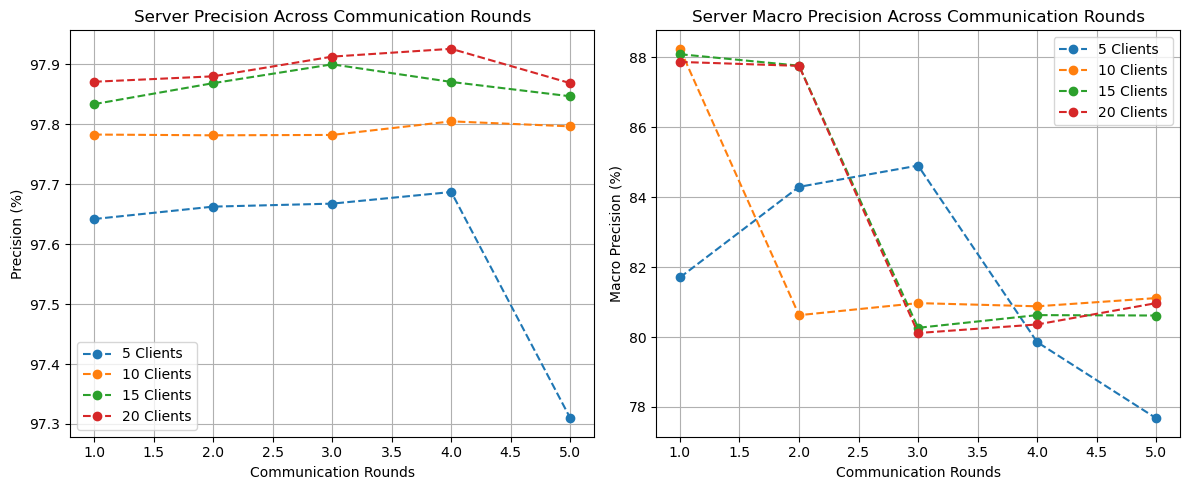

In [7]:
# plot server macro and average precision for 5 epoch 5 round
# 5 Clients 5 epochs 5 rounds case
server_precision3_5c        = joblib.load("server_prec_5c_5e_5r_datasample3.pkl")*100
server_precision_macro3_5c  = joblib.load("server_prec_macro_5c_5e_5r_datasample3.pkl")*100

# 10 Clients 5 epochs 5 rounds case
server_precision3_10c       = joblib.load("server_prec_10c_5e_5r_datasample3.pkl")*100
server_precision_macro3_10c = joblib.load("server_prec_macro_10c_5e_5r_datasample3.pkl")*100

# 15 Clients 5 epochs 5 rounds case
server_precision3_15c       = joblib.load("server_prec_15c_5e_5r_datasample3.pkl")*100
server_precision_macro3_15c = joblib.load("server_prec_macro_15c_5e_5r_datasample3.pkl")*100

# 20 Clients 5 epochs 5 rounds case
server_precision3_20c       = joblib.load("server_prec_20c_5e_5r_datasample3.pkl")*100
server_precision_macro3_20c = joblib.load("server_prec_macro_20c_5e_5r_datasample3.pkl")*100

# Define the communication rounds
communication_rounds = range(1, 6)

# Create subplots in a 1x2 grid to compare server precision and macro precision
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

# Server Precision (Left)
axes[0].plot(communication_rounds, server_precision3_5c, marker='o', linestyle='--',  label='5 Clients')
axes[0].plot(communication_rounds, server_precision3_10c, marker='o', linestyle='--', label='10 Clients')
axes[0].plot(communication_rounds, server_precision3_15c, marker='o', linestyle='--', label='15 Clients')
axes[0].plot(communication_rounds, server_precision3_20c, marker='o', linestyle='--', label='20 Clients')
axes[0].set_title('Server Precision Across Communication Rounds')
axes[0].set_xlabel('Communication Rounds')
axes[0].set_ylabel('Precision (%)')
axes[0].grid(True)
axes[0].legend()

# Server Macro Precision (Right)
axes[1].plot(communication_rounds, server_precision_macro3_5c, marker='o', linestyle='--',  label='5 Clients')
axes[1].plot(communication_rounds, server_precision_macro3_10c, marker='o', linestyle='--', label='10 Clients')
axes[1].plot(communication_rounds, server_precision_macro3_15c, marker='o', linestyle='--', label='15 Clients')
axes[1].plot(communication_rounds, server_precision_macro3_20c, marker='o', linestyle='--', label='20 Clients')
axes[1].set_title('Server Macro Precision Across Communication Rounds')
axes[1].set_xlabel('Communication Rounds')
axes[1].set_ylabel('Macro Precision (%)')
axes[1].grid(True)
axes[1].legend()

plt.tight_layout()
plt.savefig('server_precision_macro_comparison.png', dpi=300, format = "png", bbox_inches='tight')
plt.show()

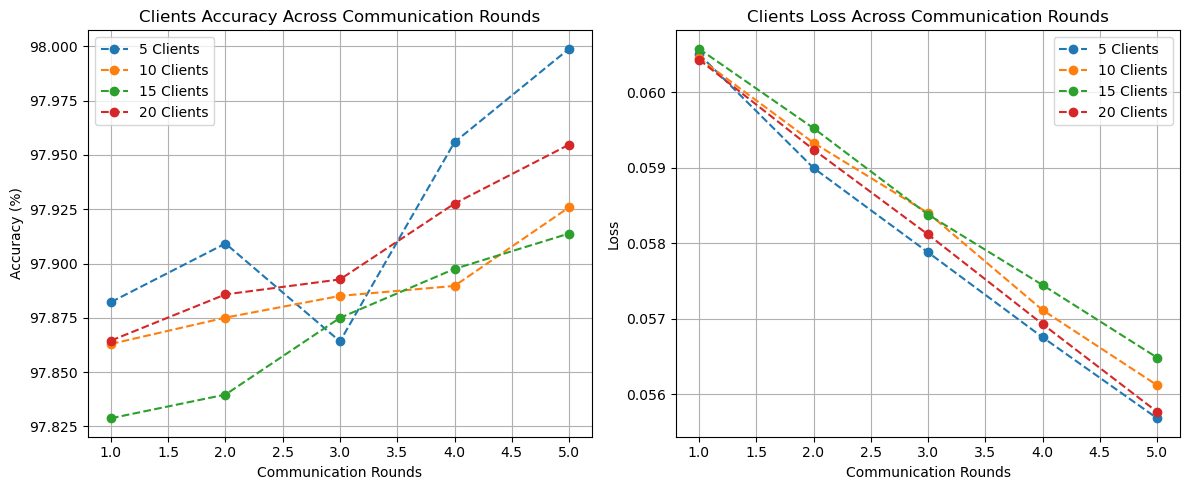

In [8]:
# plot server accuracy and loss for 5 epoch 5 round
# 5 Clients 5 epochs 5 rounds case 
client_accuracy3                = joblib.load("client_acc_5c_5e_5r_datasample3.pkl")*100
client_loss3                    = joblib.load("client_loss_5c_5e_5r_datasample3.pkl")

# 10 Clients 5 epochs 5 rounds case
client_accuracy3_10_5_5         = joblib.load("client_acc_10c_5e_5r_datasample3.pkl")*100
client_loss3_10_5_5             = joblib.load("client_loss_10c_5e_5r_datasample3.pkl")

# 15 Clients 5 epochs 5 rounds case
client_accuracy3_15_5_5         = joblib.load("client_acc_15c_5e_5r_datasample3.pkl")*100
client_loss3_15_5_5             = joblib.load("client_loss_15c_5e_5r_datasample3.pkl")

# 20 Clients 5 epochs 5 rounds case
client_accuracy3_20_5_5         = joblib.load("client_acc_20c_5e_5r_datasample3.pkl")*100
client_loss3_20_5_5             = joblib.load("client_loss_20c_5e_5r_datasample3.pkl")

# Define the communication rounds
communication_rounds = range(1, 6)

# Create subplots in a 1x2 grid to compare server precision and macro precision
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

# Server Accuracy (Left)
axes[0].plot(communication_rounds, client_accuracy3, marker='o', linestyle='--',        label='5 Clients')
axes[0].plot(communication_rounds, client_accuracy3_10_5_5, marker='o', linestyle='--', label='10 Clients')
axes[0].plot(communication_rounds, client_accuracy3_15_5_5, marker='o', linestyle='--', label='15 Clients')
axes[0].plot(communication_rounds, client_accuracy3_20_5_5, marker='o', linestyle='--', label='20 Clients')
axes[0].set_title('Clients Accuracy Across Communication Rounds')
axes[0].set_xlabel('Communication Rounds')
axes[0].set_ylabel('Accuracy (%)')
axes[0].grid(True)
axes[0].legend()

# Server Loss (Right)
axes[1].plot(communication_rounds, client_loss3, marker='o', linestyle='--',         label='5 Clients')
axes[1].plot(communication_rounds, client_loss3_10_5_5, marker='o', linestyle='--',  label='10 Clients')
axes[1].plot(communication_rounds, client_loss3_15_5_5, marker='o', linestyle='--',  label='15 Clients')
axes[1].plot(communication_rounds, client_loss3_20_5_5, marker='o', linestyle='--',  label='20 Clients')
axes[1].set_title('Clients Loss Across Communication Rounds')
axes[1].set_xlabel('Communication Rounds')
axes[1].set_ylabel('Loss')
axes[1].grid(True)
axes[1].legend()

plt.tight_layout()
plt.savefig('Clients_accuracy_vs_loss_comparison.png', dpi=300, format = "png", bbox_inches='tight')
plt.show()

In [18]:
server_precision_macro3_20c

Macro Precision
0        87.868112
1        87.754945
2        80.114667
3        80.359509
4        80.969926

In [9]:
# Metrics Performance accross different scenarious

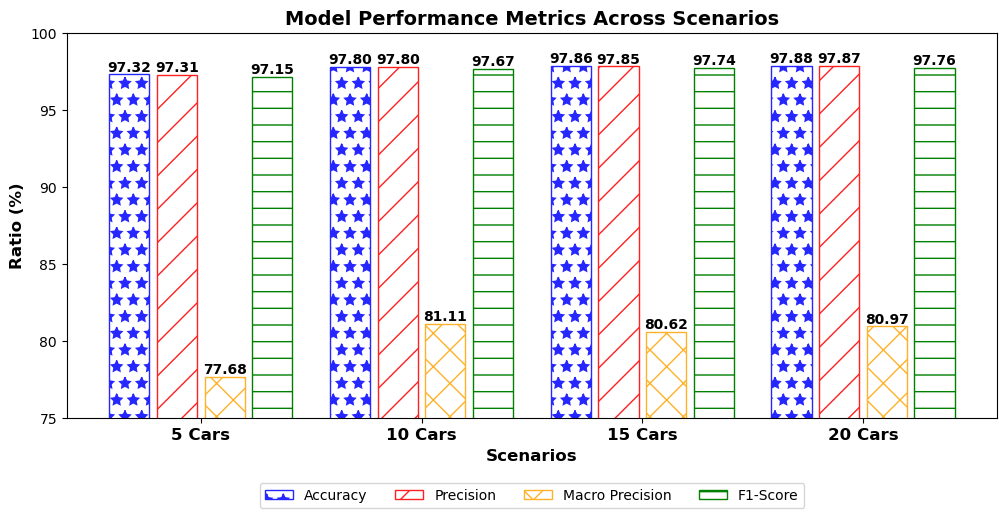

In [10]:
# Extract necessary data
accuracy_5           = metrics_clas_report3["Values"][0] * 100
precision_5          = metrics_clas_report3["Values"][1] * 100
precision_macro_5    = metrics_clas_report3["Values"][2] * 100 
f1_score_5           = metrics_clas_report3["Values"][4] * 100

accuracy_10          = metrics_clas_report3_10_5_5["Values"][0] * 100
precision_10         = metrics_clas_report3_10_5_5["Values"][1] * 100
precision_macro_10   = metrics_clas_report3_10_5_5["Values"][2] * 100  
f1_score_10          = metrics_clas_report3_10_5_5["Values"][4] * 100

accuracy_15          = metrics_clas_report3_15_5_5["Values"][0] * 100
precision_15         = metrics_clas_report3_15_5_5["Values"][1] * 100
precision_macro_15   = metrics_clas_report3_15_5_5["Values"][2] * 100
f1_score_15          = metrics_clas_report3_15_5_5["Values"][4] * 100

accuracy_20          = metrics_clas_report3_20_5_5["Values"][0] * 100
precision_20         = metrics_clas_report3_20_5_5["Values"][1] * 100
precision_macro_20   = metrics_clas_report3_20_5_5["Values"][2] * 100 
f1_score_20          = metrics_clas_report3_20_5_5["Values"][4] * 100

# list of scenario cars
scenarios_cars = ['5 Cars', '10 Cars', '15 Cars', '20 Cars']

accuracy_merged_cars = [accuracy_5, accuracy_10, accuracy_15, accuracy_20]
precision_merged_cars = [precision_5, precision_10, precision_15, precision_20]
precision_macro_merged_cars = [precision_macro_5, precision_macro_10, precision_macro_15, precision_macro_20]
f1_score_merged_cars = [f1_score_5, f1_score_10, f1_score_15, f1_score_20]

# Plotting
bar_width = 0.8 
metric_spacing = 0.15
group_spacing = 0.6

r1 = np.arange(len(scenarios_cars)) * (bar_width + metric_spacing) * 4 + np.arange(len(scenarios_cars)) * group_spacing
r2 = [x + bar_width + metric_spacing for x in r1]
r3 = [x + 2 * (bar_width + metric_spacing) for x in r1]
r4 = [x + 3 * (bar_width + metric_spacing) for x in r1]

plt.figure(figsize=(12, 5))

# Plot each metric
plt.bar(r1, accuracy_merged_cars, color='white', width=bar_width, edgecolor='#2626ff', label='Accuracy', hatch='*')
plt.bar(r2, precision_merged_cars, color='white', width=bar_width, edgecolor='#ff2020', label='Precision', hatch='/')
plt.bar(r3, precision_macro_merged_cars, color='white', width=bar_width, edgecolor='#ffb229', label='Macro Precision', hatch='x')
plt.bar(r4, f1_score_merged_cars, color='white', width=bar_width, edgecolor='#008000', label='F1-Score', hatch='-')

# Add values above bars
for i in range(len(scenarios_cars)):
    plt.text(r1[i], accuracy_merged_cars[i] - 0.01, f'{accuracy_merged_cars[i]:.2f}', ha='center', va='bottom', fontsize=10, fontweight='bold')
    plt.text(r2[i], precision_merged_cars[i] - 0.01, f'{precision_merged_cars[i]:.2f}', ha='center', va='bottom', fontsize=10, fontweight='bold')
    plt.text(r3[i], precision_macro_merged_cars[i] - 0.01, f'{precision_macro_merged_cars[i]:.2f}', ha='center', va='bottom', fontsize=10, fontweight='bold')
    plt.text(r4[i], f1_score_merged_cars[i] - 0.01, f'{f1_score_merged_cars[i]:.2f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

# Add labels, title, and legend
plt.xlabel('Scenarios', fontweight='bold', fontsize=12)
plt.xticks([r + (3 * (bar_width + metric_spacing)) / 2 for r in r1], scenarios_cars, fontsize=12, fontweight='bold')
plt.ylabel('Ratio (%)', fontweight='bold', fontsize=12)
plt.ylim([75, 100])  # Adjusted to cover the range of remaining metrics

plt.title('Model Performance Metrics Across Scenarios', fontsize=14, fontweight='bold')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=4, fontsize=10, frameon=True)

plt.savefig("Model_Performance_Metrics_Across_Car_Scenarios.png", format='png', dpi=400, bbox_inches='tight')
plt.show()

##
## ROC Curve

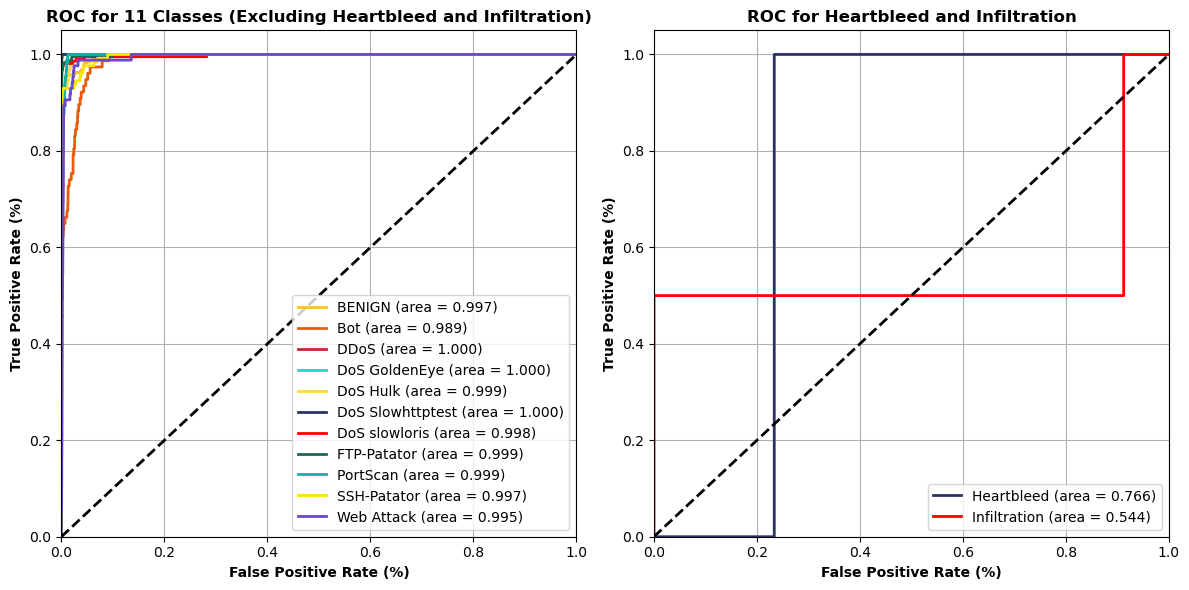

In [13]:

# Load your test data
X_test, y_test = joblib.load("test_data_datasample3.pkl")

# Convert categorical labels to numerical values
label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test)

# Binarize the encoded labels for multiclass ROC
n_classes = len(np.unique(y_test_encoded))
y_test_binarized = label_binarize(y_test_encoded, classes=np.arange(n_classes))

# Use your pre-trained MLP model to predict probabilities for the test set
mlp = final_model_20
y_score = mlp.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

# Create subplots for two plots
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# ROC Curve for 11 Classes (Excluding Heartbleed and Infiltration)
# Define a color palette for plotting different classes
colors = ['#FABC3F','#E85C0D','#C7253E','#1CD6CE','#FEDB39','#293462',
          '#FF0000', '#1C6758','#F6E96B', '#BE8C63', '#1AACAC', '#F9E400','#6C48C5']

# Define the classes to exclude from plotting
classes_to_exclude = ['Heartbleed', 'Infiltration']

# Plot ROC curves for classes that have positive samples
for i in range(n_classes):
    if np.sum(y_test_binarized[:, i]) > 0:  # Ensure there are positive samples for the class
        fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
        # Use label encoder to display class names instead of numbers
        class_name = label_encoder.inverse_transform([i])[0]
        # Check if the class should be excluded from the plot
        if class_name not in classes_to_exclude:
            ax[0].plot(fpr[i], tpr[i], color=colors[i % len(colors)], lw=2,
                       label=f'{class_name} (area = {roc_auc[i]:0.3f})')
    else:
        print(f"Skipping class {i} as it has no positive samples in the test set.")

# Plot settings
ax[0].plot([0, 1], [0, 1], 'k--', lw=2)
ax[0].set_xlim([0.0, 1.0])
ax[0].set_ylim([0.0, 1.05])
ax[0].set_xlabel('False Positive Rate (%)', fontweight='bold')
ax[0].set_ylabel('True Positive Rate (%)', fontweight='bold')
ax[0].set_title('ROC for 11 Classes (Excluding Heartbleed and Infiltration)', fontweight='bold')
ax[0].legend(loc="lower right")
ax[0].grid(True)

# ROC Curve for Heartbleed and Infiltration

# Define a color palette for the plot of Heartbleed and Infiltration
colors_2 = ['#293462', '#FF0000']

# Define the classes to include in the plot
classes_to_include = ['Heartbleed', 'Infiltration']

# Plot ROC curves for "Heartbleed" and "Infiltration" classes only
for i in range(n_classes):
    if np.sum(y_test_binarized[:, i]) > 0:  # Ensure there are positive samples for the class
        fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
        # Use label encoder to display class names instead of numbers
        class_name = label_encoder.inverse_transform([i])[0]
        # Check if the class should be included in the plot
        if class_name in classes_to_include:
            color_idx = classes_to_include.index(class_name)  # Choose the appropriate color for the class
            ax[1].plot(fpr[i], tpr[i], color=colors_2[color_idx % len(colors_2)], lw=2,
                       label=f'{class_name} (area = {roc_auc[i]:0.3f})')
    else:
        print(f"Skipping class {i} as it has no positive samples in the test set.")

# Plot settings for Heartbleed and Infiltration
ax[1].plot([0, 1], [0, 1], 'k--', lw=2)
ax[1].set_xlim([0.0, 1.0])
ax[1].set_ylim([0.0, 1.05])
ax[1].set_xlabel('False Positive Rate (%)', fontweight='bold')
ax[1].set_ylabel('True Positive Rate (%)' , fontweight='bold')
ax[1].set_title('ROC for Heartbleed and Infiltration', fontweight='bold')
ax[1].legend(loc="lower right")
ax[1].grid(True)

plt.savefig('ROC_curves_combined.png', dpi=500, format="png", bbox_inches='tight')
plt.tight_layout()
plt.show()

##
## Tables

In [14]:
# Define a function to compute overall metrics from evaluation DataFrame
def compute_overall_metrics(eval_metrics):
    # Sum the true/false positive/negative columns
    tp_sum = eval_metrics['True Positive (TP)'].sum()
    fp_sum = eval_metrics['False Positives (FP)'].sum()
    tn_sum = eval_metrics['True Negatives (TN)'].sum()
    fn_sum = eval_metrics['False Negatives (FN)'].sum()
    
    # Compute overall rates
    overall_tpr = tp_sum / (tp_sum + fn_sum)*100  # True Positive Rate (Recall/Sensitivity)
    overall_fpr = fp_sum / (fp_sum + tn_sum)*100  # False Positive Rate
    overall_tnr = tn_sum / (tn_sum + fp_sum)*100  # True Negative Rate (Specificity)
    overall_fnr = fn_sum / (fn_sum + tp_sum)*100  # False Negative Rate
    
    return overall_tpr, overall_fpr, overall_tnr, overall_fnr

scenario_results = pd.DataFrame(columns=['Scenario', 'TPR', 'FPR', 'TNR', 'FNR'])
eval_metrics_list = [metrics_ftp3, metrics_ftp3_10_5_5, metrics_ftp3_15_5_5, metrics_ftp3_20_5_5]  

# calculate metrics
for scenario_name, eval_metrics in zip(scenarios_cars, eval_metrics_list):
    overall_tpr, overall_fpr, overall_tnr, overall_fnr = compute_overall_metrics(eval_metrics)
    
    current_scenario_results = pd.DataFrame({
        'Scenario': [scenario_name],
        'TPR': [overall_tpr],
        'FPR': [overall_fpr],       
        'TNR': [overall_tnr],
        'FNR': [overall_fnr]
    })
    
    scenario_results = pd.concat([scenario_results, current_scenario_results], ignore_index=True)

# plot table
table1 = tabulate(scenario_results, headers='keys', tablefmt='fancy_grid', showindex=False, numalign="center")
print(table1)

╒════════════╤═════════╤══════════╤═════════╤═════════╕
│ Scenario   │   TPR   │   FPR    │   TNR   │   FNR   │
╞════════════╪═════════╪══════════╪═════════╪═════════╡
│ 5 Cars     │ 97.3243 │ 0.222974 │ 99.777  │ 2.67568 │
├────────────┼─────────┼──────────┼─────────┼─────────┤
│ 10 Cars    │ 97.7981 │ 0.183488 │ 99.8165 │ 2.20185 │
├────────────┼─────────┼──────────┼─────────┼─────────┤
│ 15 Cars    │ 97.8573 │ 0.178562 │ 99.8214 │ 2.14275 │
├────────────┼─────────┼──────────┼─────────┼─────────┤
│ 20 Cars    │ 97.8763 │ 0.176976 │ 99.823  │ 2.12372 │
╘════════════╧═════════╧══════════╧═════════╧═════════╛


In [26]:
metrics_ftp3_10_5_5

True Positive Rate (TPR)  False Positive Rate (FPR)  \
Attack Class                                                            
BENIGN                            0.997469                   0.116831   
Bot                               0.324675                   0.000020   
DDoS                              0.981456                   0.000222   
DoS GoldenEye                     0.977941                   0.000141   
DoS Hulk                          0.897751                   0.000194   
DoS Slowhttptest                  1.000000                   0.000341   
DoS slowloris                     0.694836                   0.000201   
FTP-Patator                       0.697872                   0.000010   
Heartbleed                        0.000000                   0.000000   
Infiltration                      0.000000                   0.000000   
PortScan                          0.750487                   0.001216   
SSH-Patator                       0.859375                   0.000010   
Web Attack                        0.058824                   0.000000   

                  True Positive (TP)  False Positives (FP)  \
Attack Class                                                 
BENIGN                         82753                  1970   
Bot                               25                     2   
DDoS                            4975                    21   
DoS GoldenEye                    399                    14   
DoS Hulk                        6146                    18   
DoS Slowhttptest                 207                    34   
DoS slowloris                    148                    20   
FTP-Patator                      164                     1   
Heartbleed                         0                     0   
Infiltration                       0                     0   
PortScan                        2695                   117   
SSH-Patator                      110                     1   
Web Attack                         5                     0   

                  True Negatives (TN)  False Negatives (FN)  
Attack Class                                                 
BENIGN                          14892                   210  
Bot                             99746                    52  
DDoS                            94735                    94  
DoS GoldenEye                   99403                     9  
DoS Hulk                        92961                   700  
DoS Slowhttptest                99584                     0  
DoS slowloris                   99592                    65  
FTP-Patator                     99589                    71  
Heartbleed                      99824                     1  
Infiltration                    99823                     2  
PortScan                        96117                   896  
SSH-Patator                     99696                    18  
Web Attack                      99740                    80

In [28]:
# Define a function to compute metrics for multi-class classification
def compute_overall_metrics(eval_metrics):
    num_classes = eval_metrics.shape[0]
    tpr_list, fpr_list, tnr_list, fnr_list = [], [], [], []
    
    for class_idx in range(num_classes):
        # True Positives (TP): Correctly classified as class i
        tp = eval_metrics[class_idx, class_idx]
        
        # False Positives (FP): Incorrectly classified as class i
        fp = eval_metrics[:, class_idx].sum() - tp
        
        # False Negatives (FN): Incorrectly classified as not class i
        fn = eval_metrics[class_idx, :].sum() - tp
        
        # True Negatives (TN): Correctly classified as not class i
        tn = eval_metrics.sum() - (tp + fp + fn)
        
        # Calculate rates
        tpr = tp / (tp + fn) * 100  # True Positive Rate (Recall/Sensitivity)
        fpr = fp / (fp + tn) * 100  # False Positive Rate
        tnr = tn / (tn + fp) * 100  # True Negative Rate (Specificity)
        fnr = fn / (fn + tp) * 100  # False Negative Rate
        
        # Append the rates to respective lists
        tpr_list.append(tpr)
        fpr_list.append(fpr)
        tnr_list.append(tnr)
        fnr_list.append(fnr)
    
    # Compute macro average of each metric
    overall_tpr = np.mean(tpr_list)
    overall_fpr = np.mean(fpr_list)
    overall_tnr = np.mean(tnr_list)
    overall_fnr = np.mean(fnr_list)
    
    return overall_tpr, overall_fpr, overall_tnr, overall_fnr

# Confusion matrices for different models
# cm_svm 
# cm_cmlp 
# cm_des_tree

# Model names and confusion matrices
models = ['SVM', 'CMLP', 'Decision Tree']
confusion_matrices = [cm_svm, cm_cmlp, cm_des_tree]

# DataFrame to store the results
scenario_results2 = pd.DataFrame(columns=['Model', 'TPR', 'FPR', 'TNR', 'FNR'])

# Iterate over confusion matrices and calculate metrics for each model
for model_name, eval_metrics in zip(models, confusion_matrices):
    overall_tpr2, overall_fpr2, overall_tnr2, overall_fnr2 = compute_overall_metrics(eval_metrics)
    
    current_scenario_results2 = pd.DataFrame({
        'Model': [model_name],
        'TPR': [overall_tpr2],
        'FPR': [overall_fpr2],       
        'TNR': [overall_tnr2],
        'FNR': [overall_fnr2]
    })
    
    # Append the results
    scenario_results2 = pd.concat([scenario_results2, current_scenario_results2], ignore_index=True)

# Print the results in a table format
table6 = tabulate(scenario_results2, headers='keys', tablefmt='fancy_grid', showindex=False, numalign="center")
print(table6)


╒═══════════════╤═════════╤═══════════╤═════════╤═════════╕
│ Model         │   TPR   │    FPR    │   TNR   │   FNR   │
╞═══════════════╪═════════╪═══════════╪═════════╪═════════╡
│ SVM           │ 13.4665 │  3.68837  │ 96.3116 │ 86.5335 │
├───────────────┼─────────┼───────────┼─────────┼─────────┤
│ CMLP          │ 65.638  │ 0.979416  │ 99.0206 │ 34.362  │
├───────────────┼─────────┼───────────┼─────────┼─────────┤
│ Decision Tree │ 86.4344 │ 0.0298616 │ 99.9701 │ 13.5656 │
╘═══════════════╧═════════╧═══════════╧═════════╧═════════╛


In [15]:
# Create a DataFrame to compare the metrics across the models
data = {
    'Model': ['MLP', 'SVM', 'Decision Tree', 'FedMLP'],
    'Accuracy': accuracy_merged_models,
    'Precision': precision_merged_models,
    'Macro Precision': precision_macro_merged_models,
    'F1-Score': f1_score_merged_models}

# Convert Dictionary to a DataFrame
metrics_df = pd.DataFrame(data)
table2 = tabulate(metrics_df, headers='keys', tablefmt='fancy_grid', showindex=False, numalign="center")
print(table2)

╒═══════════════╤════════════╤═════════════╤═══════════════════╤════════════╕
│ Model         │  Accuracy  │  Precision  │  Macro Precision  │  F1-Score  │
╞═══════════════╪════════════╪═════════════╪═══════════════════╪════════════╡
│ MLP           │  97.3842   │   97.3808   │      92.4528      │  97.0658   │
├───────────────┼────────────┼─────────────┼───────────────────┼────────────┤
│ SVM           │  64.3716   │   84.3052   │      16.0514      │  71.4536   │
├───────────────┼────────────┼─────────────┼───────────────────┼────────────┤
│ Decision Tree │  99.8229   │   99.8223   │      86.6725      │  99.8224   │
├───────────────┼────────────┼─────────────┼───────────────────┼────────────┤
│ FedMLP        │  97.8763   │   97.8687   │      80.9699      │  97.7602   │
╘═══════════════╧════════════╧═════════════╧═══════════════════╧════════════╛


In [16]:
# Create a DataFrame to compare the metrics across the different data distribution
data_distribution = {
    'Data Distribution': scenarios_datasamples,
    'Accuracy': accuracy_merged,
    'Precision': precision_merged,
    'Macro Precision': precision_macro_merged,
    'F1-Score': f1_score_merged}

# Convert Dictionary to a DataFrame
metrics_distribution_df = pd.DataFrame(data_distribution )
table3 = tabulate(metrics_distribution_df, headers='keys', tablefmt='fancy_grid', showindex=False, numalign="center")
print(table3)

╒═════════════════════╤════════════╤═════════════╤═══════════════════╤════════════╕
│ Data Distribution   │  Accuracy  │  Precision  │  Macro Precision  │  F1-Score  │
╞═════════════════════╪════════════╪═════════════╪═══════════════════╪════════════╡
│ Datasample 1        │   77.115   │   92.4837   │      37.7249      │  83.1353   │
├─────────────────────┼────────────┼─────────────┼───────────────────┼────────────┤
│ Datasample 2        │  97.2863   │   97.2438   │      74.2015      │  97.1307   │
├─────────────────────┼────────────┼─────────────┼───────────────────┼────────────┤
│ Datasample 3        │  97.3243   │   97.3096   │      77.6771      │  97.1467   │
├─────────────────────┼────────────┼─────────────┼───────────────────┼────────────┤
│ Datasample 4        │  85.7611   │   92.5291   │      28.2383      │  88.1208   │
╘═════════════════════╧════════════╧═════════════╧═══════════════════╧════════════╛


In [56]:
# Comparison between Information Gain and Random Forest Technique for Feature Selection
feature_selection = ["Information Gain", "Random Forest"]

# populate metric lists
accuracy_info_gain_vs_rand_forest = [
    metrics_clas_report_info_gain['Values'][0]* 100, 
    metrics_clas_report3['Values'][0]* 100
]

precision_info_gain_vs_rand_forest = [
    metrics_clas_report_info_gain['Values'][1]* 100, 
    metrics_clas_report3['Values'][1]* 100 
]

precision_macro_info_gain_vs_rand_forest = [
    metrics_clas_report_info_gain['Values'][2]* 100, 
    metrics_clas_report3['Values'][2]* 100 

]

f1_score_info_gain_vs_rand_forest = [
    metrics_clas_report_info_gain['Values'][4]* 100, 
    metrics_clas_report3['Values'][4]* 100 
]

loss_info_gain_vs_rand_forest =[
    metrics_clas_report_info_gain['Values'][5], 
    metrics_clas_report3['Values'][5]
]

# create dictionary
data_info_gain_vs_rand_forest = {
    "Feature Selection Technique": feature_selection,
    'Accuracy': accuracy_info_gain_vs_rand_forest,
    'Precision': precision_info_gain_vs_rand_forest,
    'Macro Precision': precision_macro_info_gain_vs_rand_forest,
    'F1-Score': f1_score_info_gain_vs_rand_forest,
    'Loss': loss_info_gain_vs_rand_forest    
}

# show table
feature_selection_performance= pd.DataFrame(data_info_gain_vs_rand_forest)
table4 = tabulate(feature_selection_performance, headers='keys', tablefmt='fancy_grid', showindex=False, numalign="center")
print(table4)

╒═══════════════════════════════╤════════════╤═════════════╤═══════════════════╤════════════╤═══════════╕
│ Feature Selection Technique   │  Accuracy  │  Precision  │  Macro Precision  │  F1-Score  │   Loss    │
╞═══════════════════════════════╪════════════╪═════════════╪═══════════════════╪════════════╪═══════════╡
│ Information Gain              │  95.4891   │   95.5689   │      77.5912      │  95.1907   │ 0.0877275 │
├───────────────────────────────┼────────────┼─────────────┼───────────────────┼────────────┼───────────┤
│ Random Forest                 │  97.3243   │   97.3096   │      77.6771      │  97.1467   │ 0.0628802 │
╘═══════════════════════════════╧════════════╧═════════════╧═══════════════════╧════════════╧═══════════╛


In [56]:
# Comparison between Information Gain and Random Forest Technique for Feature Selection
modele_selection = ["Centralized MLP (150 iterations)", "FedMLP (150 iterations)",
                    "Centralized MLP (10 iterations)", "FedMLP(1o iterations)"]

# populate metric lists
accuracy_mlp_vs_fed_mlp_converged = [
    metrics_clas_report_init_mlp_150_iter['Values'][0]* 100, 
    metrics_clas_report3_mlp_150_iter['Values'][0]* 100,
    init_model_10_iter['Values'][0]* 100,
    metrics_clas_report3['Values'][0]* 100
    
]

precision_mlp_vs_fed_mlp_converged = [
    metrics_clas_report_init_mlp_150_iter['Values'][1]* 100, 
    metrics_clas_report3_mlp_150_iter['Values'][1]* 100,
    init_model_10_iter['Values'][1]* 100,
    metrics_clas_report3['Values'][1]* 100 
]

macro_precision_mlp_vs_fed_mlp_converged = [
    metrics_clas_report_init_mlp_150_iter['Values'][2]* 100, 
    metrics_clas_report3_mlp_150_iter['Values'][2]* 100,
    init_model_10_iter['Values'][2]* 100,
    metrics_clas_report3['Values'][2]* 100 

]

f1_score_mlp_vs_fed_mlp_converged = [
    metrics_clas_report_init_mlp_150_iter['Values'][4]* 100, 
    metrics_clas_report3_mlp_150_iter['Values'][4]* 100,
    init_model_10_iter['Values'][4]* 100,
    metrics_clas_report3['Values'][4]* 100 
]

loss_mlp_vs_fed_mlp_converged =[
    metrics_clas_report_init_mlp_150_iter['Values'][5], 
    metrics_clas_report3_mlp_150_iter['Values'][5],
    init_model_10_iter['Values'][5],
    metrics_clas_report3['Values'][5]
]

# create dictionary
data_converged_mlp_vs_fed_mlp_converged = {
    "Modele Selection": modele_selection,
    'Accuracy': accuracy_mlp_vs_fed_mlp_converged,
    'Precision': precision_mlp_vs_fed_mlp_converged,
    'Macro Precision': macro_precision_mlp_vs_fed_mlp_converged,
    'F1-Score': f1_score_mlp_vs_fed_mlp_converged,
    'Loss': loss_mlp_vs_fed_mlp_converged    
}

# show table
modele_selection = pd.DataFrame(data_converged_mlp_vs_fed_mlp_converged)
table5 = tabulate(data_converged_mlp_vs_fed_mlp_converged, headers='keys', tablefmt='fancy_grid', showindex=False, numalign="center")
print(table5)

╒══════════════════════════════════╤════════════╤═════════════╤═══════════════════╤════════════╤═══════════╕
│ Modele Selection                 │  Accuracy  │  Precision  │  Macro Precision  │  F1-Score  │   Loss    │
╞══════════════════════════════════╪════════════╪═════════════╪═══════════════════╪════════════╪═══════════╡
│ Centralized MLP (150 iterations) │  98.8911   │   98.8948   │      96.6628      │  98.8299   │ 0.0436944 │
├──────────────────────────────────┼────────────┼─────────────┼───────────────────┼────────────┼───────────┤
│ FedMLP (150 iterations)          │  95.8487   │   96.0025   │      82.4923      │  95.4347   │ 0.0436944 │
├──────────────────────────────────┼────────────┼─────────────┼───────────────────┼────────────┼───────────┤
│ Centralized MLP (10 iterations)  │   97.723   │   97.7431   │      95.1753      │  97.6468   │ 0.0628802 │
├──────────────────────────────────┼────────────┼─────────────┼───────────────────┼────────────┼───────────┤
│ FedMLP(1o iterati

##